In [3]:
from langgraph.graph import StateGraph, START, END
from langchain_groq import ChatGroq
from langgraph.checkpoint.memory import InMemorySaver
from typing import TypedDict
from dotenv import load_dotenv
import operator

In [4]:
load_dotenv()

True

In [5]:
llm = ChatGroq(
    model = "llama-3.1-8b-instant",
)

In [21]:
class  JokeState(TypedDict):

    topic:str
    joke:str
    explaination:str

In [22]:
def create_joke(state:JokeState):

    prompt = f"Create a joke on the following topic- {state["topic"]}"

    response = llm.invoke(prompt)

    return {"joke":response}

In [34]:
def explain_joke(state:JokeState):

    prompt = f"Provide a short description on the following joke - {state["joke"]}"

    response = llm.invoke(prompt)

    return {"explaination":response}

In [35]:
graph = StateGraph(JokeState)

In [36]:
graph.add_node("create_joke", create_joke)
graph.add_node("explain_joke", explain_joke)

In [37]:
graph.add_edge(START,"create_joke")
graph.add_edge("create_joke","explain_joke")
graph.add_edge("explain_joke", END)

In [38]:
checkpointer = InMemorySaver()
workflow = graph.compile(checkpointer=checkpointer)


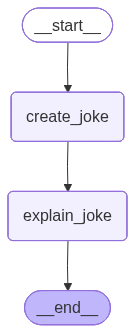

In [39]:
workflow

In [40]:
config1 = {"configurable" : {"thread_id": "1"}}
initial_state = {"topic":"Pizza"}

final_state = workflow.invoke(initial_state, config = config1)

print(final_state)

{'topic': 'Pizza', 'joke': AIMessage(content='Why did the pizza go to the doctor? \n\nBecause it was feeling a little crusty.', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 20, 'prompt_tokens': 44, 'total_tokens': 64, 'completion_time': 0.031463984, 'completion_tokens_details': None, 'prompt_time': 0.002058214, 'prompt_tokens_details': None, 'queue_time': 0.053479086, 'total_time': 0.033522198}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_1151d4f23c', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019b25d1-6bc0-7221-a439-f53206e0b12c-0', usage_metadata={'input_tokens': 44, 'output_tokens': 20, 'total_tokens': 64}), 'explaination': AIMessage(content='This joke is a play on words, using a pun to create humor. The setup "Why did the pizza go to the doctor?" implies that the pizza is ill, but the punchline "Because it was feeling a little crusty" is a wordplay on the pizza\'

In [41]:
workflow.get_state(config1)

StateSnapshot(values={'topic': 'Pizza', 'joke': AIMessage(content='Why did the pizza go to the doctor? \n\nBecause it was feeling a little crusty.', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 20, 'prompt_tokens': 44, 'total_tokens': 64, 'completion_time': 0.031463984, 'completion_tokens_details': None, 'prompt_time': 0.002058214, 'prompt_tokens_details': None, 'queue_time': 0.053479086, 'total_time': 0.033522198}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_1151d4f23c', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019b25d1-6bc0-7221-a439-f53206e0b12c-0', usage_metadata={'input_tokens': 44, 'output_tokens': 20, 'total_tokens': 64}), 'explaination': AIMessage(content='This joke is a play on words, using a pun to create humor. The setup "Why did the pizza go to the doctor?" implies that the pizza is ill, but the punchline "Because it was feeling a little crusty" is a wo

In [42]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'Pizza', 'joke': AIMessage(content='Why did the pizza go to the doctor? \n\nBecause it was feeling a little crusty.', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 20, 'prompt_tokens': 44, 'total_tokens': 64, 'completion_time': 0.031463984, 'completion_tokens_details': None, 'prompt_time': 0.002058214, 'prompt_tokens_details': None, 'queue_time': 0.053479086, 'total_time': 0.033522198}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_1151d4f23c', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019b25d1-6bc0-7221-a439-f53206e0b12c-0', usage_metadata={'input_tokens': 44, 'output_tokens': 20, 'total_tokens': 64}), 'explaination': AIMessage(content='This joke is a play on words, using a pun to create humor. The setup "Why did the pizza go to the doctor?" implies that the pizza is ill, but the punchline "Because it was feeling a little crusty" is a w

In [43]:
config2 = {"configurable": {"thread_id":"2"}}

workflow.invoke({"topic":"samosa"}, config = config2)

{'topic': 'samosa',
 'joke': AIMessage(content='Why did the samosa go to therapy? \n\nIt was feeling wrapped up in its emotions.', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 20, 'prompt_tokens': 45, 'total_tokens': 65, 'completion_time': 0.033359587, 'completion_tokens_details': None, 'prompt_time': 0.003083642, 'prompt_tokens_details': None, 'queue_time': 0.094023075, 'total_time': 0.036443229}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_ff2b098aaf', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019b25d4-484f-7ef1-8835-f98adc97b24f-0', usage_metadata={'input_tokens': 45, 'output_tokens': 20, 'total_tokens': 65}),
 'explaination': AIMessage(content='The joke is a play on words. A samosa is a type of Indian snack that is often wrapped in a pastry. The joke is saying that the samosa went to therapy because it was "wrapped up in its emotions," which is a common idiomati

In [44]:
workflow.get_state(config2)

StateSnapshot(values={'topic': 'samosa', 'joke': AIMessage(content='Why did the samosa go to therapy? \n\nIt was feeling wrapped up in its emotions.', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 20, 'prompt_tokens': 45, 'total_tokens': 65, 'completion_time': 0.033359587, 'completion_tokens_details': None, 'prompt_time': 0.003083642, 'prompt_tokens_details': None, 'queue_time': 0.094023075, 'total_time': 0.036443229}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_ff2b098aaf', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019b25d4-484f-7ef1-8835-f98adc97b24f-0', usage_metadata={'input_tokens': 45, 'output_tokens': 20, 'total_tokens': 65}), 'explaination': AIMessage(content='The joke is a play on words. A samosa is a type of Indian snack that is often wrapped in a pastry. The joke is saying that the samosa went to therapy because it was "wrapped up in its emotions," which i

In [46]:
list(workflow.get_state_history(config2))

[StateSnapshot(values={'topic': 'samosa', 'joke': AIMessage(content='Why did the samosa go to therapy? \n\nIt was feeling wrapped up in its emotions.', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 20, 'prompt_tokens': 45, 'total_tokens': 65, 'completion_time': 0.033359587, 'completion_tokens_details': None, 'prompt_time': 0.003083642, 'prompt_tokens_details': None, 'queue_time': 0.094023075, 'total_time': 0.036443229}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_ff2b098aaf', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019b25d4-484f-7ef1-8835-f98adc97b24f-0', usage_metadata={'input_tokens': 45, 'output_tokens': 20, 'total_tokens': 65}), 'explaination': AIMessage(content='The joke is a play on words. A samosa is a type of Indian snack that is often wrapped in a pastry. The joke is saying that the samosa went to therapy because it was "wrapped up in its emotions," which 

In [48]:
## Time Travel

In [49]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'Pizza', 'joke': AIMessage(content='Why did the pizza go to the doctor? \n\nBecause it was feeling a little crusty.', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 20, 'prompt_tokens': 44, 'total_tokens': 64, 'completion_time': 0.031463984, 'completion_tokens_details': None, 'prompt_time': 0.002058214, 'prompt_tokens_details': None, 'queue_time': 0.053479086, 'total_time': 0.033522198}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_1151d4f23c', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019b25d1-6bc0-7221-a439-f53206e0b12c-0', usage_metadata={'input_tokens': 44, 'output_tokens': 20, 'total_tokens': 64}), 'explaination': AIMessage(content='This joke is a play on words, using a pun to create humor. The setup "Why did the pizza go to the doctor?" implies that the pizza is ill, but the punchline "Because it was feeling a little crusty" is a w

In [51]:
workflow.get_state({"configurable":{"thread_id":"1", 'checkpoint_id': '1f0da475-8008-627a-bfff-880dc95c5719'}})

StateSnapshot(values={}, next=('__start__',), config={'configurable': {'thread_id': '1', 'checkpoint_id': '1f0da475-8008-627a-bfff-880dc95c5719'}}, metadata={'source': 'input', 'step': -1, 'parents': {}}, created_at='2025-12-16T06:20:40.244697+00:00', parent_config=None, tasks=(PregelTask(id='99abe43f-ef2f-dc80-7388-68754171fdb2', name='__start__', path=('__pregel_pull', '__start__'), error=None, interrupts=(), state=None, result={'topic': 'Pizza'}),), interrupts=())

In [52]:
workflow.invoke(None, {"configurable":{"thread_id":"1", 'checkpoint_id': '1f0da475-8008-627a-bfff-880dc95c5719'}})

{'topic': 'Pizza',
 'joke': AIMessage(content='Why did the pizza go to the doctor? \n\nBecause it was feeling a little crusty.', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 20, 'prompt_tokens': 44, 'total_tokens': 64, 'completion_time': 0.032467859, 'completion_tokens_details': None, 'prompt_time': 0.002067419, 'prompt_tokens_details': None, 'queue_time': 0.050856431, 'total_time': 0.034535278}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_4387d3edbb', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019b25d9-47f1-7681-a904-5c791f172455-0', usage_metadata={'input_tokens': 44, 'output_tokens': 20, 'total_tokens': 64}),
 'explaination': AIMessage(content='The joke is a play on words, using the phrase "crusty" to make a pun on the fact that a pizza has a crust, but also implying that the pizza is feeling a bit ill or "crusty" like someone with a grumpy demeanor. The punchline

In [53]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'Pizza', 'joke': AIMessage(content='Why did the pizza go to the doctor? \n\nBecause it was feeling a little crusty.', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 20, 'prompt_tokens': 44, 'total_tokens': 64, 'completion_time': 0.032467859, 'completion_tokens_details': None, 'prompt_time': 0.002067419, 'prompt_tokens_details': None, 'queue_time': 0.050856431, 'total_time': 0.034535278}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_4387d3edbb', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019b25d9-47f1-7681-a904-5c791f172455-0', usage_metadata={'input_tokens': 44, 'output_tokens': 20, 'total_tokens': 64}), 'explaination': AIMessage(content='The joke is a play on words, using the phrase "crusty" to make a pun on the fact that a pizza has a crust, but also implying that the pizza is feeling a bit ill or "crusty" like someone with a grumpy dem

In [57]:
workflow.update_state({"configurable":{"thread_id":"1", 'checkpoint_id': '1f0da475-8008-627a-bfff-880dc95c5719', 'checkpoint_ns': ''}}, {"topic":"pasta"})

{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1f0da48f-ded2-6dad-8000-3d2e8aaac9d6'}}

In [58]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'pasta'}, next=('create_joke',), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0da48f-ded2-6dad-8000-3d2e8aaac9d6'}}, metadata={'source': 'update', 'step': 0, 'parents': {}}, created_at='2025-12-16T06:32:28.116522+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0da475-8008-627a-bfff-880dc95c5719'}}, tasks=(PregelTask(id='3fb96365-210d-7687-6c4b-c90687ca55ab', name='create_joke', path=('__pregel_pull', 'create_joke'), error=None, interrupts=(), state=None, result=None),), interrupts=()),
 StateSnapshot(values={'topic': 'Pizza', 'joke': AIMessage(content='Why did the pizza go to the doctor? \n\nBecause it was feeling a little crusty.', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 20, 'prompt_tokens': 44, 'total_tokens': 64, 'completion_time': 0.032467859, 'completion_tokens_details': None, 'prompt_time': 0.002067419, 'prompt_tokens_deta

In [59]:
workflow.invoke(None, {"configurable":{"thread_id":"1", 'checkpoint_id': '1f0da48f-ded2-6dad-8000-3d2e8aaac9d6'}})

{'topic': 'pasta',
 'joke': AIMessage(content='Why did the spaghetti go to therapy? \n\nBecause it was feeling a little "twisted."', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 20, 'prompt_tokens': 44, 'total_tokens': 64, 'completion_time': 0.039024177, 'completion_tokens_details': None, 'prompt_time': 0.003263848, 'prompt_tokens_details': None, 'queue_time': 0.053384542, 'total_time': 0.042288025}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_1151d4f23c', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019b25dd-83f9-7962-a592-f85f83c1f610-0', usage_metadata={'input_tokens': 44, 'output_tokens': 20, 'total_tokens': 64}),
 'explaination': AIMessage(content='The joke is a play on words, using a pun to create humor. The setup "Why did the spaghetti go to therapy?" establishes a familiar format for a joke, and the punchline "Because it was feeling a little \'twisted\'" is a c

In [60]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'pasta', 'joke': AIMessage(content='Why did the spaghetti go to therapy? \n\nBecause it was feeling a little "twisted."', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 20, 'prompt_tokens': 44, 'total_tokens': 64, 'completion_time': 0.039024177, 'completion_tokens_details': None, 'prompt_time': 0.003263848, 'prompt_tokens_details': None, 'queue_time': 0.053384542, 'total_time': 0.042288025}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_1151d4f23c', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019b25dd-83f9-7962-a592-f85f83c1f610-0', usage_metadata={'input_tokens': 44, 'output_tokens': 20, 'total_tokens': 64}), 'explaination': AIMessage(content='The joke is a play on words, using a pun to create humor. The setup "Why did the spaghetti go to therapy?" establishes a familiar format for a joke, and the punchline "Because it was feeling a little